# SETI Breakthrough Listen - E.T. Signal Search: A Simple EDA 

In this competition, we are provided with radio spectrograms and we are asked to use machine learning to classify the presence of simulated extraterrestial signals in the spectrograms. It’s hard to search for a faint needle of alien transmission in the huge haystack of detections from modern technology, and we hope that machine learning can speed up the search!

I'll provide a quick and simple EDA to help you get started with this fun competition! 

## A look at the data

Let's start out by setting up our environment by importing the required modules:

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastai.vision.all import *

Let's check what data is available to us:

In [ ]:
dataset_path = Path('../input/seti-breakthrough-listen')

In [ ]:
dataset_path.ls()

We can see that we have: 
- a `train_labels.csv` file, which has our labels indicating the presence of an E.T. signal (referred to as needles) for each of the spectrograms (refered to as our haystack)
- `train` folder contains `.npy` files with the spectrograms stored as arrays
- Similarly, `test` folder also contains `.npy` files with the test spectrograms stored as arrays 
- Of course, we are provided with a `sample_submission.csv` file!

Let's check the `train.csv` file:

In [ ]:
train_path = dataset_path/'train'
train_df = pd.read_csv(dataset_path/'train_labels.csv')

In [ ]:
train_df.head(30)

Seems like having a "needle" is quite a rare occurance in this dataset! Let's create a histogram of the label frequencies:

In [ ]:
train_df.hist()

Clearly a very imbalanced dataset! This must be accounted for during modeling. For example, the dataset may have to be over/undersampled or the loss function must be adjusted to account for the imbalance. 

Below, I print exactly how many spectrograms in the training set have "needles".

In [ ]:
print(f"There are {len(train_df[train_df.target==1])} 'needles' in the training set")

Okay, let's examine some of these spectrograms!

In [ ]:
train_files = get_files(dataset_path/'train',extensions='.npy')

In [ ]:
len(train_files)

All the spectrograms are saved as numpy arrays. Typically, the data comes with extra metadata, but the organizes said that:

> For the purposes of the Kaggle challenge, we have discarded the majority of the metadata and are simply presenting numpy arrays consisting of small regions of the spectrograms that we refer to as “snippets”

In [ ]:
example_npy = np.load(sorted(train_files)[0])

In [ ]:
example_npy.shape

As you can see, the each spectrogram has a shape of `(6,273,256)`. Let's talk a little bit more about the spectrograms generated in this dataset. As an example, let's look at an actual extraterrestrial signal, from the interplanetary [Voyager 1](https://en.wikipedia.org/wiki/Voyager_1) spacecraft:

![image.png](https://storage.googleapis.com/kaggle-media/competitions/SETI-Berkeley/Screen%20Shot%202021-05-03%20at%2011.39.42.png)

Here you can see that that we have a radio telescope looking at a particular area in the sky, and we get a spectrogram of radio signals from a range of frequencies over a given amount of time. Then the telescope is aimed at a different location and the spectrogram is recorded again. The telescope alternates between the desired location in the sky (in this case the location of the spacecraft) and some other location in the sky, generating a total of 6 spectrograms. One set of 6 observations is referred to as a _cadence_. A potential extraterrestrial signal likely is only occuring in a specific location in the sky, and likely isn't a signal with a constant frequency.


More information about the spectrograms are provided [here](https://www.kaggle.com/c/seti-breakthrough-listen/overview/data-information).


We can plot all of the spectrograms in the cadence:

In [ ]:
def show_data(arr):
    assert arr.shape == (6, 273, 256)
    fig = plt.figure(figsize=(16, 10))
    for i in range(arr.shape[0]):
        plt.subplot(arr.shape[0], 1, i+1)
        plt.imshow(arr[i].astype(float), aspect='auto')
    fig.text(0.5, 0.04, 'Frequency ➡', ha='center', fontsize=16)
    fig.text(0.04, 0.5, '⬅ Time', va='center', rotation='vertical', fontsize=16)
    plt.show()

In [ ]:
show_data(example_npy)


Here, I have presented a postive example:

In [ ]:
example_npy = np.load(train_path/'0'/'001c619bdf53.npy')

In [ ]:
show_data(example_npy)


You can see the signal is present in alternating spectrograms of the cadence (when the radio telescope is looking at the desired region of the sky), and the signal does not have a constant radio frequency.

## Evaluation and Submission

The submissions are evaluated using the Area Under the Receiver-Operating Characteristic (AUROC) curve. Let's look at the sample submission file to see how we are supposed to submit our predictions:

In [ ]:
submission_df = pd.read_csv(dataset_path/'sample_submission.csv')

In [ ]:
submission_df.head()

We can see we just have to submit the probably for the presence of the extraterrestrial signal for each of the spectrograms, as indicated by their ID.

In [ ]:
submission_df["target"] = 0.51
submission_df.to_csv("submission.csv", index=False)

Now, **WE ARE DONE!**

If you enjoyed this notebook, **please give it an upvote.** If you have any questions or suggestions, please leave a comment!

If you want a simple CNN training+inference starter notebook for this competition, please check out my notebook [here](https://www.kaggle.com/tanlikesmath/seti-et-signal-detection-a-simple-cnn-starter/).

Good luck, fellow participants! 

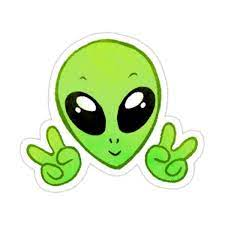